<a href="https://colab.research.google.com/github/flpsantos3/PD_part3/blob/Eduardo/PD03_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining / Prospeção de Dados

## Diogo F. Soares and Sara C. Madeira, 2020/21

# Project 3 - Classification/Regression

## Logistics

**_Read Carefully_**

**Students should work in teams of 2 or 3 people**. 

Individual projects might be allowed (with valid justification), but will not have better grades for this reason. 

* Tasks **1 to 4** should be done by **all** groups **BUT**
    * In Tasks **2 and 3** the number of classifiers/regressors to use is **`X` = 3 and 4**  for groups of 2 and 3 students, respectively.
    * In Task **4**, groups of 2 and 3 students should try 2 and 3 ensemble approaches, respectively.

The quality of the project will dictate its grade, not the number of people working.

**The project's solution should be uploaded in Moodle before the end of ~~`May, 9th (23:59)`~~ `May, 16th (23:59)`.** 

Students should **upload a `.zip` file** containing all the files necessary for project evaluation. 
Groups should be registered in [Moodle](https://moodle.ciencias.ulisboa.pt/mod/groupselect/view.php?id=139096) and the zip file should be identified as `PDnn.zip` where `nn` is the number of your group.

**It is mandatory to produce a Jupyter notebook containing code and text/images/tables/etc describing the solution and the results. Projects not delivered in this format will not be graded. You can use `PD_202021_P3.ipynb`as template. In your `.zip` folder you should also include an HTML version of your notebook with all the outputs** (File > Download as > HTML).

**Decisions should be justified and results should be critically discussed.** 

_Project solutions containing only code and outputs without discussions will achieve a maximum grade 10 out of 20._

## Dataset and Tools

In this project you should use [Python 3](https://www.python.org), [Jupyter Notebook](http://jupyter.org) and **[Scikit-learn](http://scikit-learn.org/stable/). You are also allowed to use [Orange3](https://orange.biolab.si).**

The dataset to be analysed is **`RestaurantsRevenue.csv`**, a modified version of the test dataset used in Kaggle's competition ["Restaurant Revenue Prediction"](https://www.kaggle.com/c/restaurant-revenue-prediction/overview). 

**This project challenges you twice** by asking you to tackle a
1. **Regression Task**: predict the revenue, and a
2. **Classification Task**: predict a revenue category.

The available variables are:

* **Id :** Restaurant id. 
* **Open Date :** opening date for a restaurant
* **City :** City that the restaurant is in. Note that there are unicode in the names. 
* **City Group:** Type of the city. Big cities, or Other. 
* **Type:** Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* **P1, P2 - P37:** There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.


The targets are:
1. **`Revenue`:** The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 
2. **`RevenueCategory`** - the revenue category, where price can be below 12000 ("<12K"), between 12000 and 20000 ("12K-20K"), or above 20000 (">20K"). This is the target variable that you're trying to predict in the classification task. 

## Team Identification

**GROUP PD03**

Students:

* **Eduardo Carvalho - nº55881**
* **Filipe Santos - nº55142**
* **Ivo Oliveira - nº50301**

## 1. Load and Preprocess Dataset

Here you might consider useful to think about:
1. Missing Value Imputation
2. Feature Selection
3. Class Imbalance

### Importing necessary packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

### Importing the Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/projetoPD/RestaurantsReveneu.csv', index_col=0)
data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10033.0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,9355.0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,11353.0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,10828.0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,9354.0


### Exploratory Data Analysis

In [7]:
# looking at the dataset shape
data.shape

(100000, 42)

> We have a dataset with 100K observations and 41 features + 1 target variable - `revenue`.

In [8]:
# looking at data types
data.dtypes 

Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64
P21             int64
P22             int64
P23             int64
P24             int64
P25             int64
P26           float64
P27           float64
P28           float64
P29           float64
P30             int64
P31             int64
P32             int64
P33             int64
P34             int64
P35             int64
P36             int64
P37             int64
revenue       float64
dtype: object

> There doesn't seem to be any errors in the data types: all numerical features are either int or float and the categorical are objects.

In [9]:
# looking at the range of values of the numerical features
data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,3.311720,5.061440,5.086630,1.280090,1.305530,1.747070,1.156880,1.708470,5.191120,4.57086,2.542380,2.430380,3.63998,1.234450,1.244110,1.279665,1.164440,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500,14698.061620
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,2.068118,1.765383,0.979339,2.496782,2.166949,3.172012,2.432646,3.030527,5.785529,3.61243,2.526046,1.363184,4.71916,2.097457,2.084731,2.309640,2.179495,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267,6705.081965
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6271.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10143.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.00000,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12951.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.00000,3.000000,3.000000,4.00000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,16923.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,15.000000,25.000000,15.00000,15.000000,5.000000,25.00000,10.000000,10.000000,12.500000,12.500000,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000,52294.000000


> All the P(X) features have small ranges (most are between 0 and 20), so there doesn't appear to exist any errors in the data.
>
> The target variable `revenue` has a large range of values, with the min being 6K and the max > 50K. 
>
> We should look at outliers in this variable.

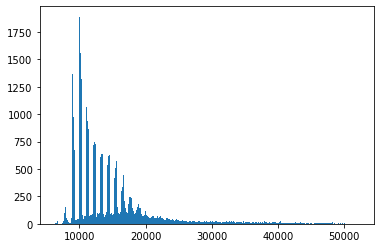

In [10]:
plt.hist(data.revenue, bins=1000)
plt.show()

> Most revenue values are situated between 10K and 20K. The remaining values are evenly spaced between the 20K range and the 50K range. There doesn't seem to exist any restaurant with a much larger revenue than the rest.

In [11]:
# looking at categorical features
cat_vars = ['Open Date', 'City', 'City Group', 'Type']
for var in cat_vars:
  print(var)
  print(data[var].nunique())
  print(data[var].value_counts())
  print('\n')

Open Date
310
07/10/2013    645
05/06/2013    635
07/04/2011    635
09/20/2013    632
03/05/1996    631
             ... 
11/25/2009    276
08/23/2013    275
09/01/2010    274
11/12/2010    267
12/23/2012    265
Name: Open Date, Length: 310, dtype: int64


City
57
İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman         

> There are two problems with the categorical data in the dataset:
>
> *   `Open Date`: there are too many different values in this feature to be able to treat it like a categorical variable (encoding the feature would lead to a large number of new features that would add too much noise to the data).
> 
> There is, however, a solution: we can convert this categorical feature to a numerical one that represents the number of days since the restaurant opened, keeping all the information and solving the current issue.
>
> *   `City`: like the issue before, there are 31 different cities on the dataset. Encoding them all would lead to the addition of over 30 new features to the dataset. However, we have another feature - `City Group` - that can gives us location info while only having 2 different values. We can use `City Group` and drop `City` from the dataset.



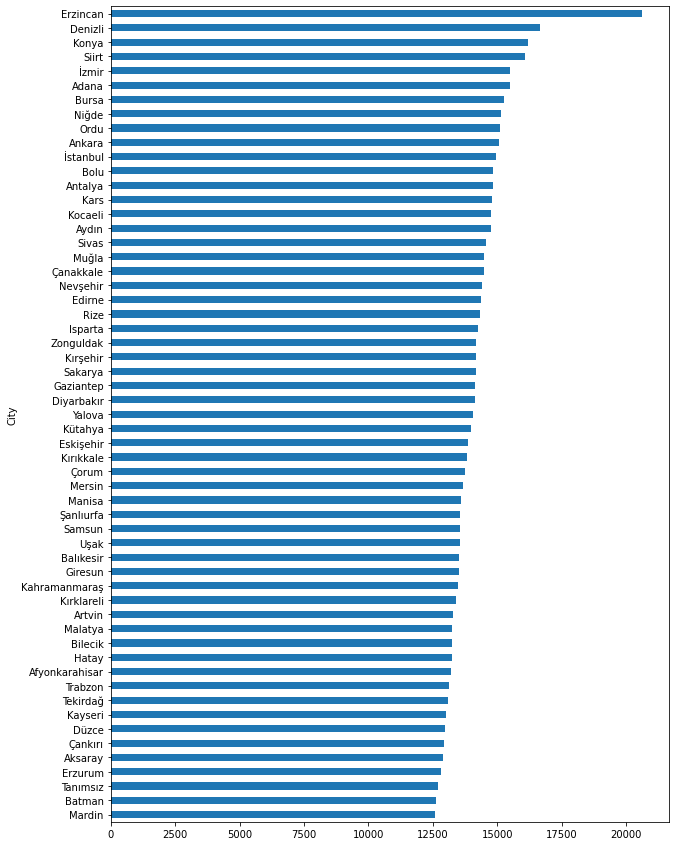

In [12]:
revenue_by_city = data.revenue.groupby(data.City).mean().sort_values()
revenue_by_city.plot.barh(figsize=(10,15))
plt.show()

> There doesn't seem to be a considerable difference in Revenue between different cities (the only City that does not fit the norm is Erzincan, which is considerably higher than the rest).
>
> It appears to be relatively "safe" to drop `City` and get location information solely from `City Group`.

In [13]:
# converting Open Date to days_since_open
days_since_open=[]
for dt in data['Open Date']:
  open_date = datetime.strptime(dt, "%m/%d/%Y").date()
  today = date.today()
  delta = today - open_date
  days_since_open.append(delta.days)

data['days_since_open']=days_since_open
new_data=data.drop('Open Date', axis=1)

# dropping City
new_data=new_data.drop('City', axis=1)
new_data.head(3)

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,days_since_open
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,10033.0,3774
1,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,9355.0,3719
2,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,11353.0,2762


### Missing Values

In [14]:
# checking the number of nulls for each feature
new_data.isnull().sum()

City Group         0
Type               0
P1                 0
P2                 0
P3                 0
P4                 0
P5                 0
P6                 0
P7                 0
P8                 0
P9                 0
P10                0
P11                0
P12                0
P13                0
P14                0
P15                0
P16                0
P17                0
P18                0
P19                0
P20                0
P21                0
P22                0
P23                0
P24                0
P25                0
P26                0
P27                0
P28                0
P29                0
P30                0
P31                0
P32                0
P33                0
P34                0
P35                0
P36                0
P37                0
revenue            0
days_since_open    0
dtype: int64

> There are no null values in the dataset. As such, there is no need to think about missing value imputation strategies to employ.

### Feature Selection

In [15]:
new_data.shape

(100000, 41)

> We still have 40 features in the dataset, 37 of which represent the 3 categories of obfuscated data. We should look at these variables and select from among them the most relevant ones.
>
> We will use the VarianceThreshold method and select the features which show the largest variance.

In [16]:
num_vars=new_data.iloc[:, 2:39]
num_vars.head(3)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0


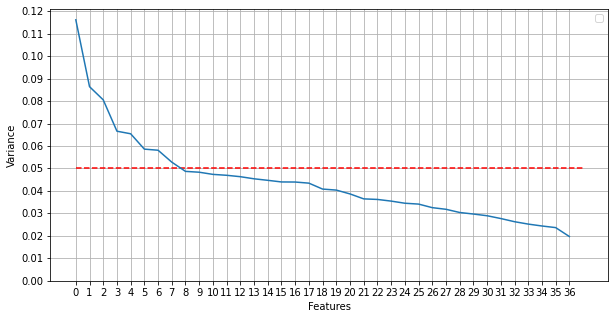

In [17]:
# creating a VarianceThreshold object with threshold=0
var_thresh = VarianceThreshold(threshold=0)

# standardizing the data
std_num_vars = MinMaxScaler().fit_transform(num_vars)

# fitting the object to the standardized dataset
var_thresh.fit(std_num_vars)

# creating a dataframe containing the variances for all the features in the dataset
df_var=pd.DataFrame(var_thresh.variances_, columns=['Variance'])\
                .sort_values(by='Variance', ascending=False)
# plotting the variances in df_var
# we need to reset the index for the plot to make sense
plt.figure(figsize=(10, 5))
plt.plot(df_var.reset_index(drop=True))
plt.grid(True)
plt.hlines(y=0.05, xmin=0, xmax=len(df_var), linestyles='--', colors='red')
plt.xlabel('Features')
plt.xticks(range(0, len(df_var)))
plt.ylabel('Variance')
plt.yticks(np.arange(0, 0.13, 0.01))
plt.legend('')
plt.show()

> The variance seems to stabilize below 0.05 so we will only choose the features which have variance higher than 0.05.

In [18]:
df_var[df_var['Variance']>0.05]

,Variance
21,0.116141
9,0.086396
8,0.080526
19,0.066579
32,0.065434
6,0.058595
18,0.058111
10,0.052803


In [19]:
int_vars=list(df_var[df_var['Variance']>0.05].index)
high_var=num_vars.iloc[:, int_vars]
high_var.head(3)

,P22,P10,P9,P20,P33,P7,P19,P11
Id,,,,,,,,
0,1,5,5,5,0,5,5,5
1,2,4,4,5,0,5,5,2
2,5,5,4,5,0,5,5,4


> From the original 37 features of obfuscated data we are left with only 8, the features with the highest variance among them.

In [20]:
cols_to_keep = ['revenue', 'City Group', 'Type', 'days_since_open'] + list(high_var.columns)
new_data = new_data[cols_to_keep]
new_data.head(3)

,revenue,City Group,Type,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11
Id,,,,,,,,,,,,
0,10033.0,Other,FC,3774,1,5,5,5,0,5,5,5
1,9355.0,Other,IL,3719,2,4,4,5,0,5,5,2
2,11353.0,Big Cities,FC,2762,5,5,4,5,0,5,5,4


### Encoding categorical features - `City Group` and `Type`

> `City Group` and `Type` are categorical features, with strings as values. We need to convert these to a model friendly format. The get_dummies function from pandas performs One-Hot Encoding on a dataset, creating new features for each group in each feature, that represent the presence or absence of that feature in each row.

In [21]:
# using get_dummies function
enc_data=pd.get_dummies(new_data, columns=['City Group', 'Type'])

# keeping only Big_Cities - Big Cities have value 1, Others have value 0
enc_data=enc_data.drop('City Group_Other', axis=1)

# renaming Big Cities
enc_data=enc_data.rename(columns={'City Group_Big Cities':'Big_Cities'})

enc_data.head(3)

,revenue,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,10033.0,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


### Creating classification target - `RevenueCategory`

In [22]:
# creating new feature according to the project info
rev_category=[]
for val in data.revenue:
  if val < 12000:
    rev_category.append("<12K")
  elif val > 12000 and val < 20000:
    rev_category.append("12K-20K")
  else:
    rev_category.append(">20K")

enc_data.insert(1, 'RevenueCategory', rev_category)
enc_data.head(3)

,revenue,RevenueCategory,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,,
0,10033.0,<12K,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,<12K,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,<12K,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [23]:
# checking class balance
enc_data.RevenueCategory.value_counts()

12K-20K    43926
<12K       43401
>20K       12673
Name: RevenueCategory, dtype: int64

> The class of >20K revenue has a much lower count than the rest. We will need to upsample the number of observations in this category to the number of observations of the remaining classes, as to avoid classification metrics' bias.
>
> We will need to create 30000 new observations for this class to match the number of elements in each of the other 2, using sklearn's resample function.
>
> Before we upsample, we will have to separate the dataset into 2, one for each task, as to not influence the values for the target variable `revenue` when we upsample the >20K category entries.

In [24]:
# separating minority and majority classes
df_min = enc_data[enc_data['RevenueCategory']=='>20K']
df_major = enc_data[enc_data['RevenueCategory']!='>20K']

# upsampling
df_min_upsample = resample(df_min,
                           replace=True,
                           n_samples=43000,
                           random_state=0)

# creating class_data, the dataset for the classification task
class_data=pd.concat([df_major, df_min_upsample])
class_data=class_data.drop('revenue', axis=1)

class_data.RevenueCategory.value_counts()

12K-20K    43926
<12K       43401
>20K       43000
Name: RevenueCategory, dtype: int64

> While this choice fixes the imbalance issue, it can cause problems when it comes to overfitting, as we are introducing in the dataset more of the same data. We will have to take this into consideration when looking at the models' metrics.

In [25]:
print('There are', str(class_data.shape[0]), 'rows and', str(class_data.shape[1]-1), 'features in the classification dataset.\n')
class_data.head(3)

There are 130327 rows and 14 features in the classification dataset.



,RevenueCategory,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,<12K,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,<12K,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,<12K,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [26]:
# creating reg_data, the dataset for the regression task
reg_data=enc_data.drop('RevenueCategory', axis=1)

print('There are', str(reg_data.shape[0]), 'rows and', str(reg_data.shape[1]-1), 'features in the regression dataset.\n')
reg_data.head(3)

There are 100000 rows and 14 features in the regression dataset.



,revenue,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,10033.0,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


> This concludes the preprocessing part of the project. We are left with one dataset for each of the classification and regression tasks, containing over 100 thousand entries and 14 features. There are 2 target variables: `revenue` for the regression task and `RevenueCategory` for the classification task.

## 2. Learning Simple Classifiers

* Choose **`X` classifiers** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and stratified 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Present mean and standard deviation of accuracy, precision and recall.
* Show confusion matrices.

In [27]:
# Present and Discuss your results here
# ...

## 3. Learning Simple Regressors

* Choose **`X` regressors** (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).
* Use **grid-search and 10 fold cross-validation** to estimate the best parameters (https://scikit-learn.org/stable/model_selection.html#model-selection). 
* Use the mean absolute error regression loss, or other relevant metrics.

> As we saw at the end of the preprocessing stage, we were left with 2 datasets, one for each task. For the regression task, the dataset to be used is `reg_data`, a dataset with 14 features, where the target variable is the continuous feature `revenue`, the amount of money each restaurant made in a year.

In [28]:
reg_data.head(3)

,revenue,days_since_open,P22,P10,P9,P20,P33,P7,P19,P11,Big_Cities,Type_DT,Type_FC,Type_IL,Type_MB
Id,,,,,,,,,,,,,,,
0,10033.0,3774,1,5,5,5,0,5,5,5,0,0,1,0,0
1,9355.0,3719,2,4,4,5,0,5,5,2,0,0,0,1,0
2,11353.0,2762,5,5,4,5,0,5,5,4,1,0,1,0,0


In [29]:
reg_data.shape

(100000, 15)

In [30]:
# splitting features and target
X = reg_data.drop('revenue', axis=1)
y = reg_data.revenue

# splitting train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> We need to standardize the data, as `days_since_open` has a much larger range than the remaining features.

In [31]:
# standardizing the data
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> Moving on to the modes, the four chosen regression models were Ridge, SVR, KNeighborsRegressor and DecisionTreeRegressor.
>
> For each of these models, we will define different values for the parameters and run GridSearchCV to find the ones that minimize the mean absolute error of the predictions for X_test.

### Ridge

In [31]:
ridge = Ridge(random_state=0)
ridge.fit(X_train_scaled, y_train)
ridge.score(X_train_scaled, y_train) # max is 1, 0.77 is fine

0.7717973192142956

In [32]:
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

2143.078932267465


In [ ]:
# ridge_params={'alpha': list(range(1,11)),
#               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# gs = GridSearchCV(estimator=Ridge(), 
#                   param_grid=ridge_params, 
#                   scoring='neg_mean_absolute_error', 
#                   cv=10,
#                   n_jobs=-1)

# gs = gs.fit(X_train_scaled, y_train)
# print(gs.best_score_)
# print(gs.best_params_)

In [33]:
# building Ridge model with the best parameters from Gridsearch
gs_ridge=Ridge(alpha=3, solver='sag', random_state=0)
gs_ridge.fit(X_train_scaled, y_train)

# predicting X_test values
gs_y_pred = gs_ridge.predict(X_test_scaled)

# calculating mean absolute error of the prediction
mae = mean_absolute_error(y_test, gs_y_pred)
print('MAE:', mae)

MAE: 2143.0997193387275


### Decision Tree Regressor

In [34]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train) # great value for R2

0.989127689788098

In [35]:
dtr_params={'criterion': ['mse'], # tried mse, friedman_mse, mae, poisson
            'splitter': ['best'], #tried random too
            'min_samples_split': np.arange(0.1, 1.1, 0.1),
            'max_features': list(range(1,15))
            }

gs_dtr = GridSearchCV(estimator=DecisionTreeRegressor(), 
                  param_grid=dtr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1,
                  verbose=2)

gs_dtr.fit(X_train_scaled, y_train)
print(gs_dtr.best_score_)
print(gs_dtr.best_params_)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1370 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:   54.0s finished


-2390.1366519680005
{'criterion': 'mse', 'max_features': 13, 'min_samples_split': 0.1, 'splitter': 'best'}


In [36]:
# building DecisionTreeRegressor model with the best parameters from Gridsearch
gs_dtree=DecisionTreeRegressor(criterion='mse',
                               splitter='best',
                               min_samples_split=0.1,
                               max_features=14,
                               random_state=0)

gs_dtree.fit(X_train_scaled, y_train)

# predicting X_test values
gs_y_pred = gs_dtree.predict(X_test_scaled)

# calculating mean absolute error of the prediction
mae = mean_absolute_error(y_test, gs_y_pred)
print('MAE:', mae)

MAE: 2381.7307788881653


### K-Neigbors Regressor

In [37]:
knr = KNeighborsRegressor()
knr.fit(X_train_scaled, y_train)
knr.score(X_train_scaled, y_train) # 0.86 is good

0.8588964988677652

In [38]:
knr_params={'n_neighbors': list(range(5, 106, 10)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gs_knr = GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), 
                  param_grid=knr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs_knr.fit(X_train_scaled, y_train)
print(gs_knr.best_score_)
print(gs_knr.best_params_)

KeyboardInterrupt: ignored

> Preliminary `n_neighbors` study to determine a suitable interval for this parameter.

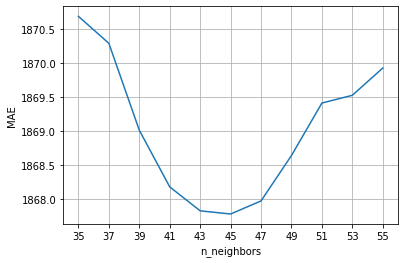

In [39]:
results={}
for k in range(35, 56, 2):
  gs_knreg=KNeighborsRegressor(n_neighbors=k, weights='distance', algorithm='brute')
  gs_knreg.fit(X_train_scaled, y_train)

  # predicting X_test values
  gs_y_pred = gs_knreg.predict(X_test_scaled)

  # calculating mean absolute error of the prediction
  mae = mean_absolute_error(y_test, gs_y_pred)
  results[k]=mae

n_neighbors=list(results.keys())
knn_mae=list(results.values())
plt.plot(n_neighbors, knn_mae)
plt.xticks(n_neighbors)
plt.xlabel('n_neighbors')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

> Minimum MAE seems to be between 35 and 55.

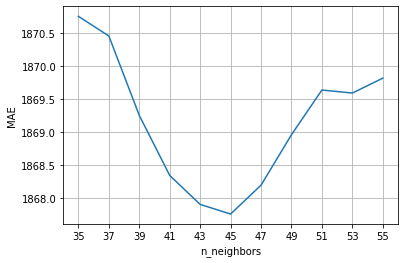

In [40]:
results={}
for k in range(35, 56, 2):
  gs_knreg=KNeighborsRegressor(n_neighbors=k, algorithm='auto', weights='distance')
  gs_knreg.fit(X_train_scaled, y_train)

  # predicting X_test values
  gs_y_pred = gs_knreg.predict(X_test_scaled)

  # calculating mean absolute error of the prediction
  mae = mean_absolute_error(y_test, gs_y_pred)
  results[k]=mae

n_neighbors=list(results.keys())
knn_mae=list(results.values())
plt.plot(n_neighbors, knn_mae)
plt.xticks(n_neighbors)
plt.xlabel('n_neighbors')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

> Minimum MAE is between 43 and 45 n_neighbors. We will use this range for the parameter `n_neighbors` in the gridsearch for the best parameters.

In [41]:
knr_params={'n_neighbors': list(range(41, 48)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

gs_knr = GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1), 
                  param_grid=knr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs_knr.fit(X_train_scaled, y_train)
print(gs_knr.best_score_)
print(gs_knr.best_params_)

KeyboardInterrupt: ignored

In [42]:
# building KNeighborsRegressor model with the best parameters from Gridsearch
gs_knreg=KNeighborsRegressor(n_neighbors=43, algorithm='ball_tree', weights='distance')
gs_knreg.fit(X_train_scaled, y_train)

# predicting X_test values
gs_y_pred = gs_knreg.predict(X_test_scaled)

# calculating mean absolute error of the prediction
mae = mean_absolute_error(y_test, gs_y_pred)
print('MAE:', mae)

KeyboardInterrupt: ignored

### SVR

In [43]:
svr = LinearSVR(random_state=0)
svr.fit(X_train_scaled, y_train)
svr.score(X_train_scaled, y_train) # 0.72 is fine

0.716640001340725

In [44]:
svr_params={'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
            'dual': [True, False],
            'C': [0.1, 1, 10, 100, 1000]}

gs_svr = GridSearchCV(estimator=LinearSVR(random_state=0), # normal SVR takes too long
                  param_grid=svr_params, 
                  scoring='neg_mean_absolute_error', 
                  cv=10,
                  n_jobs=-1)

gs_svr.fit(X_train_scaled, y_train)
print(gs_svr.best_score_)
print(gs_svr.best_params_)

KeyboardInterrupt: ignored

In [45]:
# building LinearSVR model with the best parameters from Gridsearch
gs_svreg=LinearSVR(loss='epsilon_insensitive', C=100, dual=True, random_state=0)
gs_svreg.fit(X_train_scaled, y_train)

# predicting X_test values
gs_y_pred = gs_svreg.predict(X_test_scaled)

# calculating mean absolute error of the prediction
mae = mean_absolute_error(y_test, gs_y_pred)
print('MAE:', mae)

MAE: 2076.0455621236038


> The best of the 4 models were **KNeighbors Regressor** (MAE=1868) followed by **LinearSVR** (MAE=2076) and **Ridge** (MAE=2143). **DecisionTreeRegressor** was the worst with a mean absolute error of 2381.

## 4. Ensemble Learning

In this section, we'll explore a trio of classifiers.

With this, we intend to figure out which classifiers work best considering our data input.

Below is the implementatino of a voting classifier, taking into account our best performant models, as seen in section 3.



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

knr_vote = KNeighborsClassifier(n_neighbors = 7,weights = 'distance', algorithm = 'brute')
svr_vote = LinearSVC(random_state=0, tol=1e-05)
modelsNames = [('KNeighborsClassifier',knr_vote),
               ('LinearSVR',svr_vote),
               ('ridge', RidgeClassifier())]

votingClassifier = VotingClassifier(voting = 'hard',estimators= modelsNames)
votingClassifier.fit(X_train_scaled, y_train)

As can be seen above, the voting classifier uses the **hard** voting, which is also known as majority voting, in which every individual classifier votes for a class, and the majority wins.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### XGBoost 

Next we will use XGBoost. XGBoost is a very popular gradient algorithm and is known for its performance and pattern calculation.

In [ ]:
xgb_classif = xgb.XGBClassifier()
xgb_classif = xgb_classif.fit(X_train_scaled, y_train)
xgb_score = xgb_classif.score(X_test_scaled, y_test)

### Random Forest

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=1)
rfc_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=5)
rfc_score = rfc_scores.mean()

### Gradient Boosting Classifier

In Gradient Boosting each predictor tries to improve on its predecessor by reducing the errors. 

In [217]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1).fit(X_train_scaled, y_train)
gbc_scores = gbc.score(X_test_scaled, y_test)
gbc_score = gbc_scores.mean()

### *Classifier Discussion*

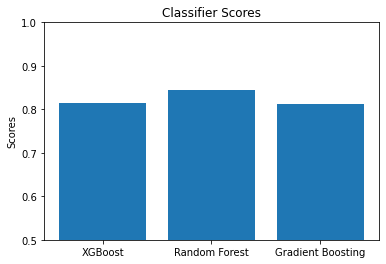


 XGBoost's Score:  0.81519 
 Random Forest's Score:  0.84409 
 Gradient Boosting's Score:  0.81255


In [218]:
scores_total = (xgb_score, rfc_score, gbc_score)
names = ('XGBoost', 'Random Forest', 'Gradient Boosting')
y_pos = np.arange(len(scores_total))
plt.bar(names, scores_total, align='center')
plt.xticks(y_pos, names)
plt.ylabel('Scores')
plt.title('Classifier Scores')
plt.ylim([0.5, 1])
plt.show()

print("\n XGBoost's Score: ", "{:.5f}".format(xgb_score),
"\n Random Forest's Score: ", "{:.5f}".format(rfc_score),
"\n Gradient Boosting's Score: ", "{:.5f}".format(gbc_score))

## 5. Conclusions

Draw some final conclusions about this project work